In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [ ]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'NanumMyeongjo'
print(mpl.rcParams['font.family'])


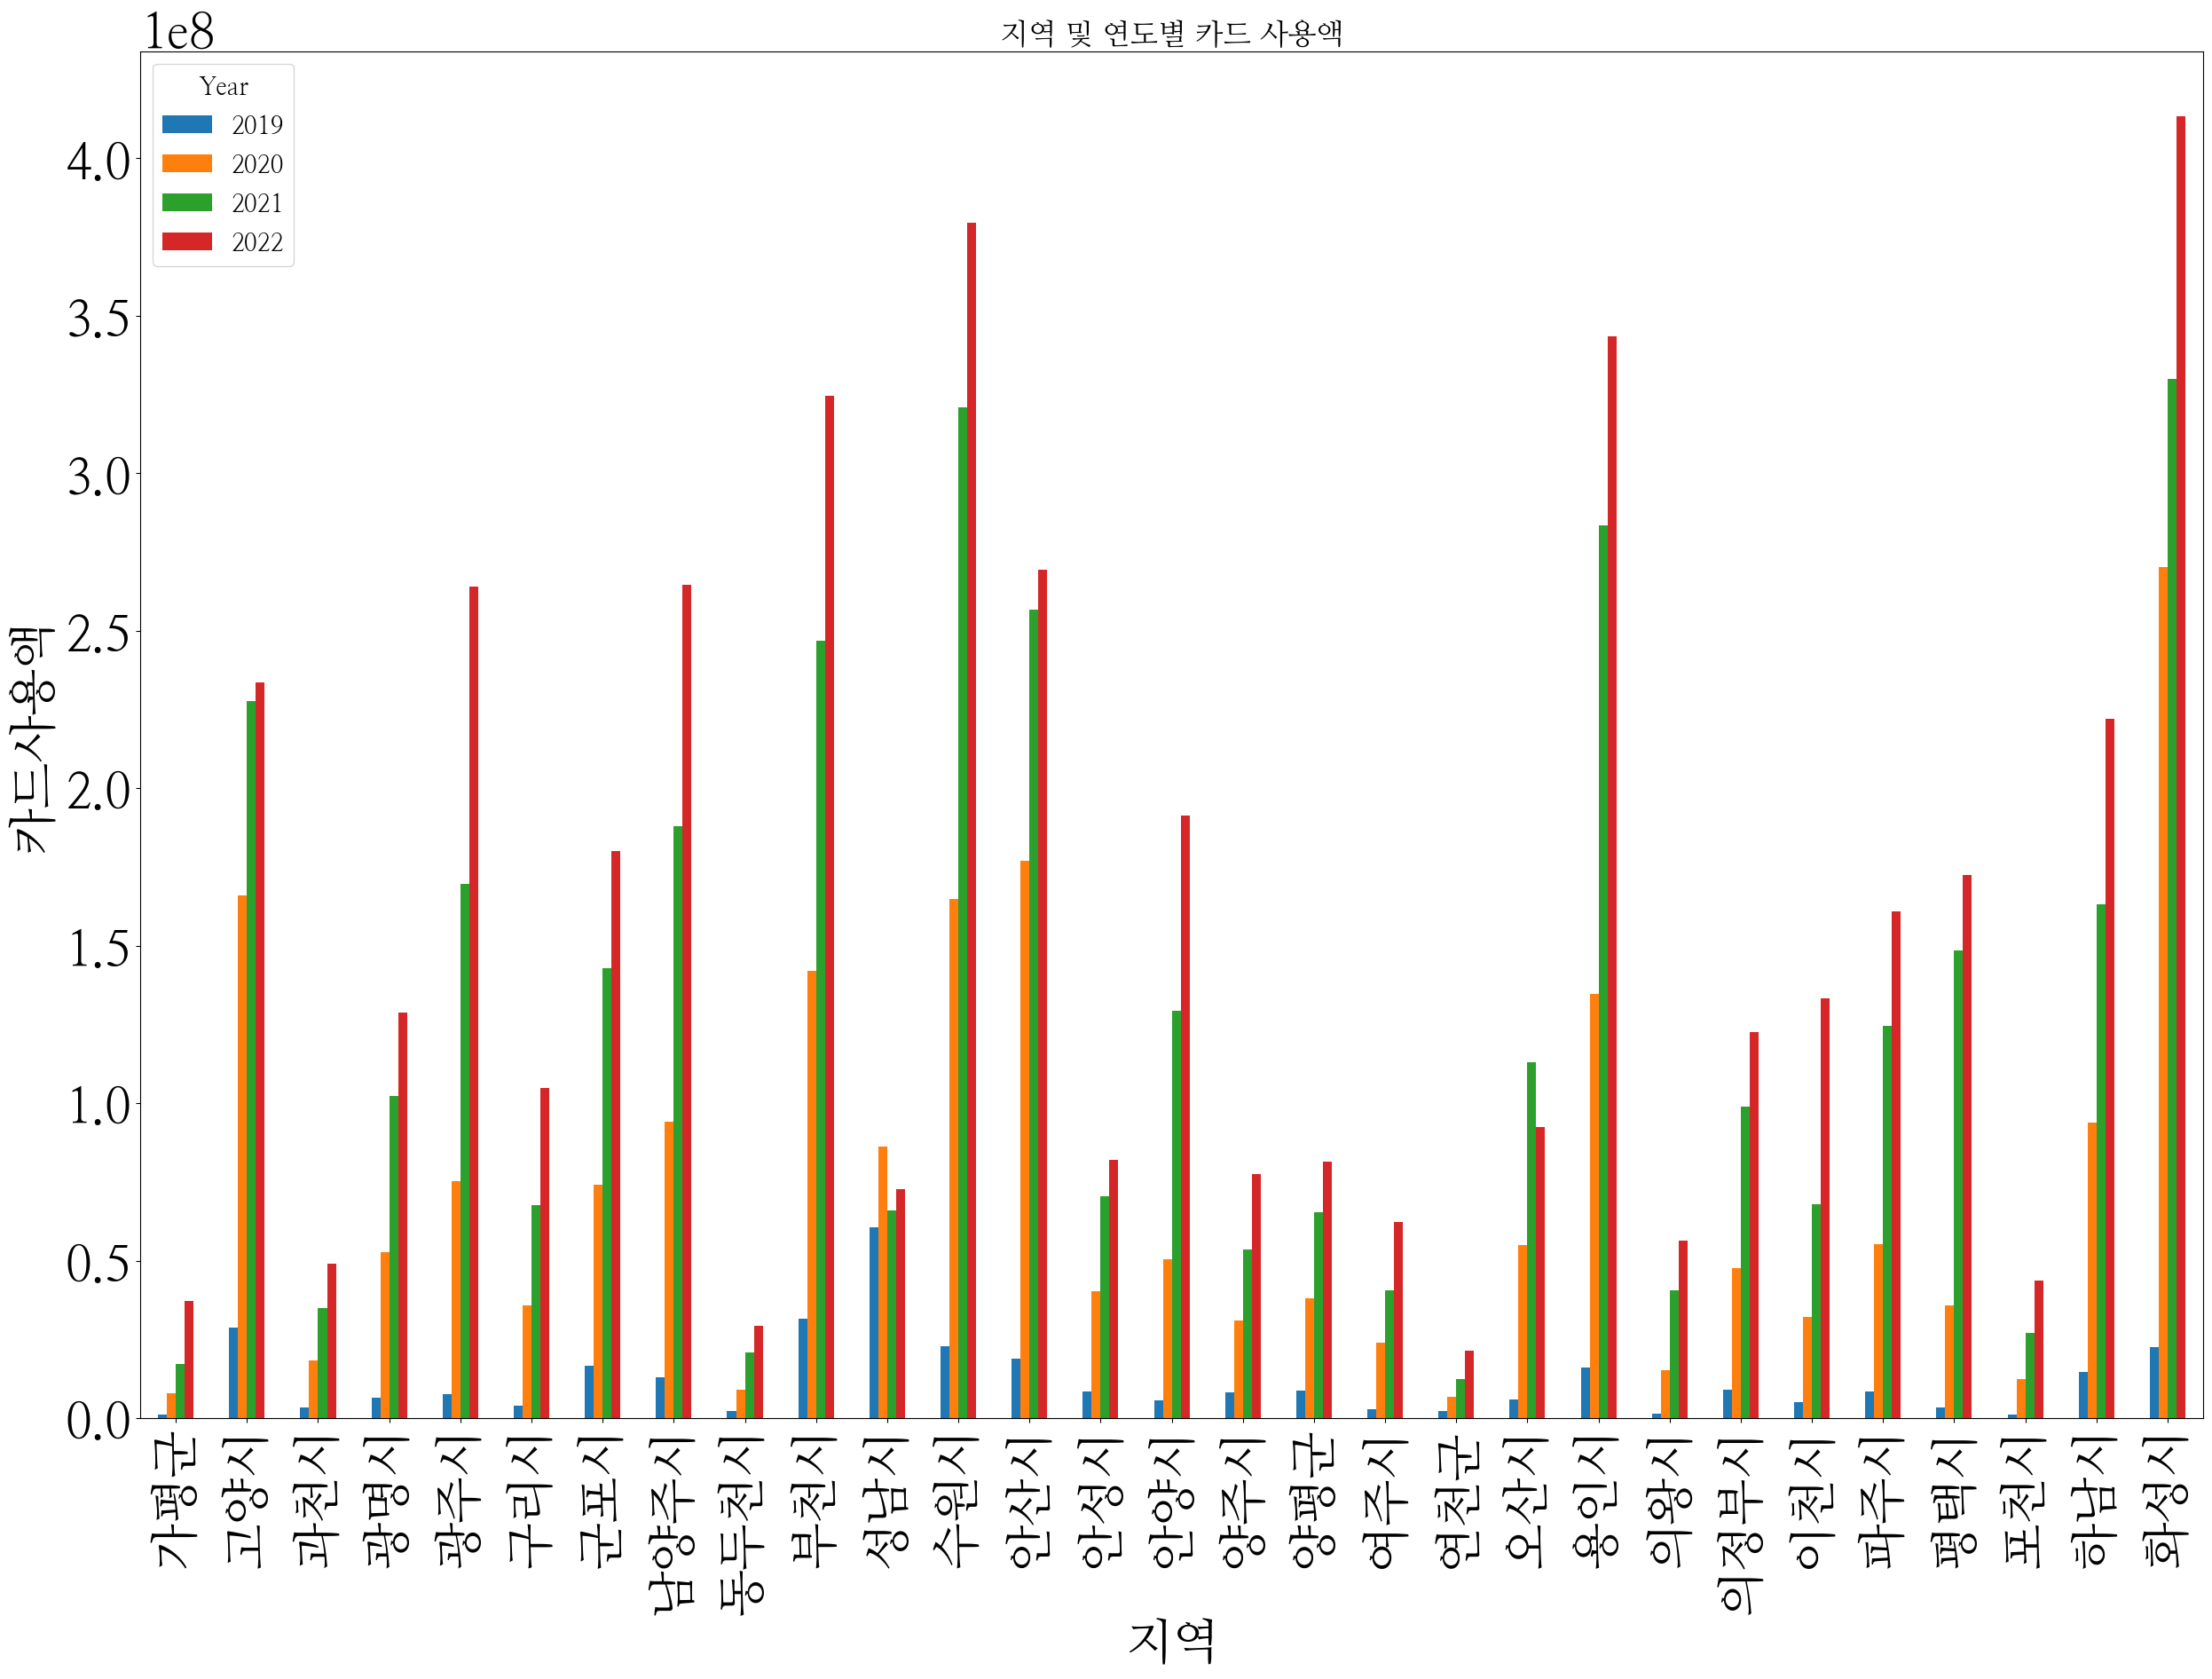

In [382]:
local_g = pd.read_csv('team7/지역화폐발행및이용현황.csv', encoding='CP949', low_memory=False)
local_g = local_g.drop(['월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)', '월별지류상품권회수액(천원)'], axis=1)

local_g['기준년월'] = local_g['기준년월'].str.split('-').str[0] 

local_g1 = local_g.groupby(['시군명', '기준년월']).sum()
local_g1 = local_g1.drop(['월별카드발행수량(건)', '월별카드충전액(천원)'], axis=1)

# 도시별 년도별 총 사용량으로 나눔
temp3 = local_g1.reset_index()
pivot_temp = pd.pivot_table(temp3,
               index = "시군명",
               columns = "기준년월",
               values = "월별카드사용액(천원)")
pivot_temp

temp4 = pivot_temp.reset_index()
temp4.drop([7, 13], inplace=True)
temp4

ax = temp4.plot(x='시군명', kind='bar', figsize=(30, 20), rot=0)

# x, y축 레이블, 그래프 제목 설정

ax.set_xlabel('지역')
ax.set_ylabel('카드사용액')
ax.set_title('지역 및 연도별 카드 사용액')

plt.xticks(rotation=90)



# 범례 추가
ax.legend(title='Year')

plt.show()


In [391]:
local_g = pd.read_csv('team7/지역화폐발행및이용현황.csv', encoding='CP949', low_memory=False)

In [384]:
local_22 = local_g[local_g['기준년월'] > '2022']  ## 22년도 경기도 자료
local_21 = local_g[local_g['기준년월'] > '2021'] 
local_21 = local_21[local_21['기준년월'] < '2022']  ## 21년도 경기도 자료
local_20 = local_g[local_g['기준년월'] > '2020']
local_20 = local_20[local_20['기준년월'] < '2021']  ## 20년도 경기도 자료
local_19 = local_g[local_g['기준년월'] > '2019']
local_19 = local_19[local_19['기준년월'] < '2020']  ## 19년도 경기도 자료

total_19 = local_19[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_20 = local_20[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_21 = local_21[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_22 = local_22[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()

print(total_21)
total_21

월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64


월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64

In [392]:
# 지역화폐발행및이용현황.csv 파일에서 필요없는 컬럼 삭제하고 카드 자료만 남김
local_g = local_g.drop(['월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)', '월별지류상품권회수액(천원)'], axis=1)

In [394]:
# 년도별 시군별 카드 사용액으로 나눔
local_g['기준년월'] = local_g['기준년월'].str.split('-').str[0] 

local_g1 = local_g.groupby(['시군명', '기준년월']).sum()
local_g1 = local_g1.drop(['월별카드발행수량(건)', '월별카드충전액(천원)'], axis=1)
local_g1

월별카드사용액(천원)
시군명 기준년월             
가평군 2019    1163080.0
    2020    7838598.0
    2021   17090192.0
    2022   37295334.0
고양시 2019   28739326.0
...               ...
하남시 2022  222027665.0
화성시 2019   22496907.0
    2020  270290214.0
    2021  329956017.0
    2022  413288098.0

[124 rows x 1 columns]

In [395]:
#  년도별 시군별 총 사용액으로 나눔
temp3 = local_g1.reset_index()
pivot_temp = pd.pivot_table(temp3,
               index = "시군명",
               columns = "기준년월",
               values = "월별카드사용액(천원)")
pivot_temp

temp4 = pivot_temp.reset_index()
temp4.drop([7, 13], inplace=True)  # 자료가 없는 시흥과 김포 삭제
temp4

기준년월,시군명,2019,2020,2021,2022
0,가평군,1163080.0,7838598.0,17090192.0,37295334.0
1,고양시,28739326.0,165952369.0,227763309.0,233629399.0
2,과천시,3321976.0,18277683.0,34990151.0,48901935.0
3,광명시,6372380.0,52619450.0,102319815.0,128884694.0
4,광주시,7557041.0,75327338.0,169707917.0,264018232.0
5,구리시,4011320.0,35658236.0,67749794.0,104856810.0
6,군포시,16642604.0,74169504.0,142795935.0,180159645.0
8,남양주시,12979396.0,94044048.0,187900637.0,264578012.0
9,동두천시,2106819.0,8998356.0,20767173.0,29409195.0
10,부천시,31543254.0,142099351.0,246942642.0,324609192.0


In [397]:
# 19년도 부터 22년도까지의 시, 및 군별 사용 총액  김포시와 시흥시는 값이 없어서 삭제함
temp1 = local_g.groupby('시군명').sum()
temp1 = temp1.rename({'월별카드발행수량(건)': '카드발행수량',
              '월별카드충전액(천원)': '카드충전액',
              '월별카드사용액(천원)': '카드사용액'
             }, axis=1).reset_index().drop(['카드충전액','카드발행수량'], axis=1)
temp1['카드사용액(백만원)'] = temp1['카드사용액'] / 1000
temp1.drop('카드사용액', axis=1, inplace=True)
temp1.sort_values(by='카드사용액(백만원)', ascending=False, inplace = True)
temp1.drop([13, 7], inplace=True)

temp1

,시군명,카드사용액(백만원)
30,화성시,1036031.236
12,수원시,887904.691
22,용인시,777503.305
10,부천시,745194.439
14,안산시,721905.744
1,고양시,656084.403
8,남양주시,559502.093
4,광주시,516610.528
29,하남시,493562.217
6,군포시,413767.688


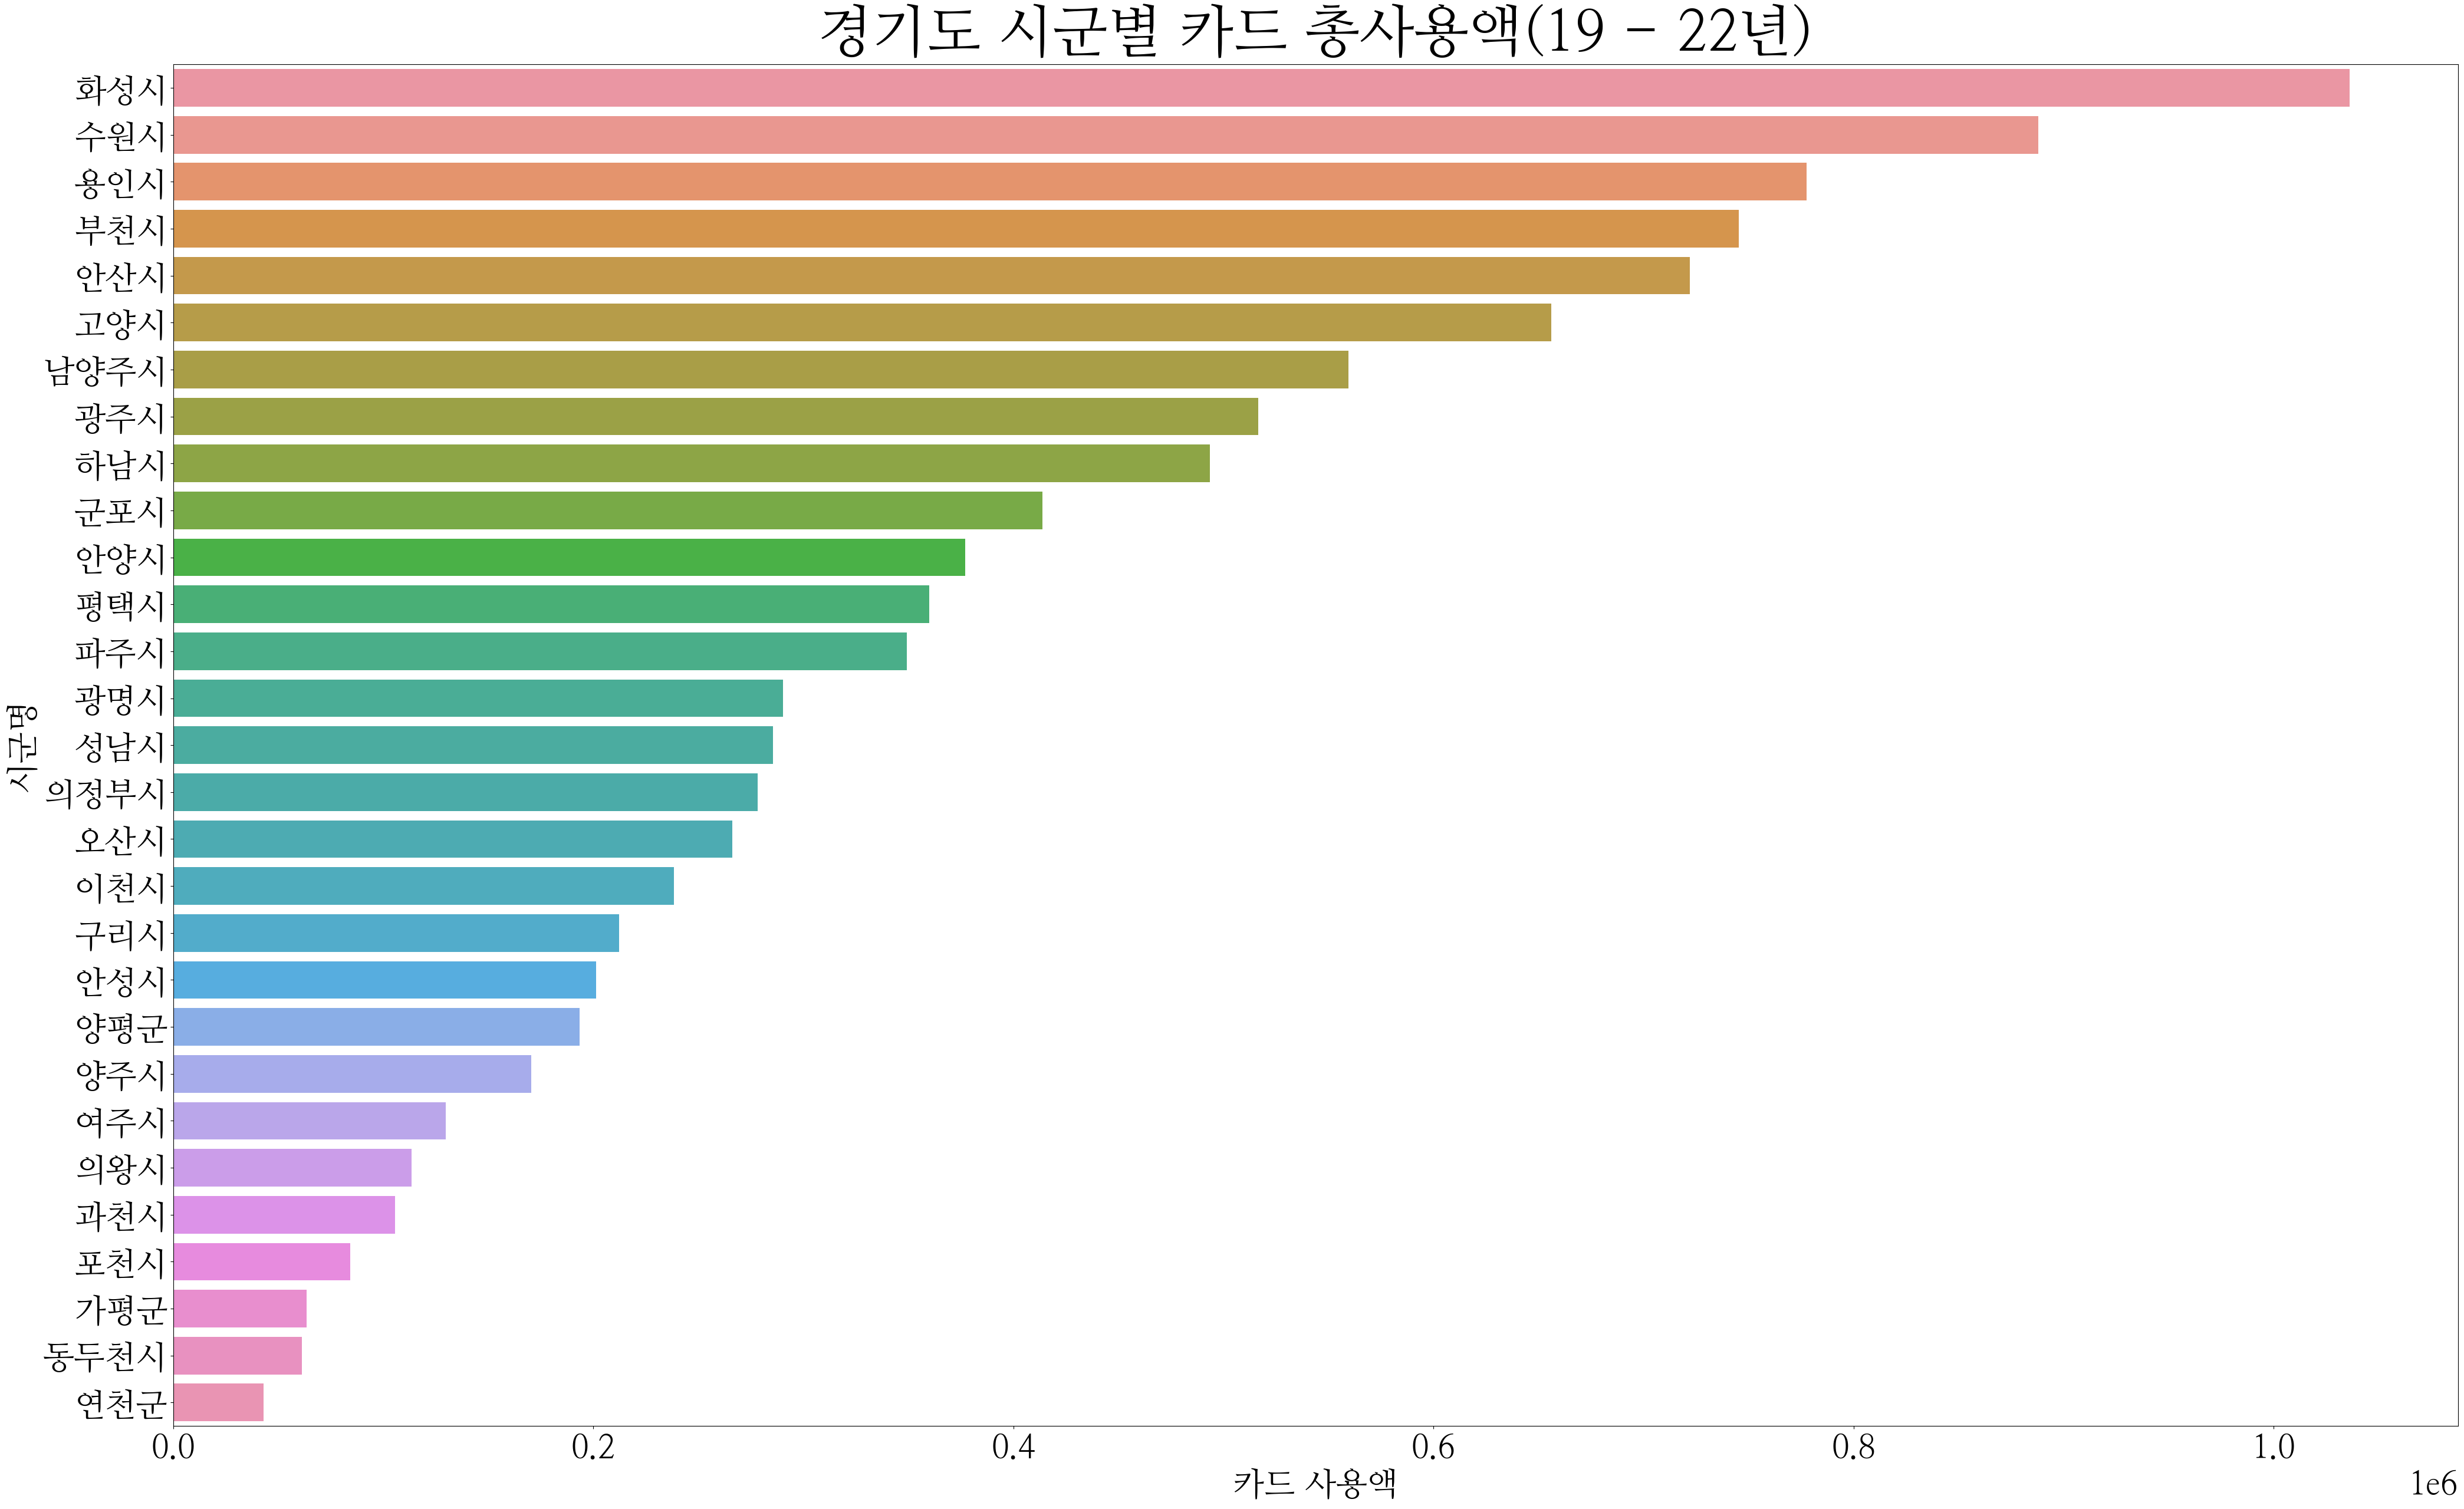

In [398]:
# 경기도 시군별 카드 총 사용액
plt.figure(figsize=(50,30))  
plt.rc('font', size=20)
plt.rc('axes', labelsize=40)   
plt.rc('xtick', labelsize=40)   
plt.rc('ytick', labelsize=40)  
plt.xticks(rotation = 0)
sns.barplot(data=temp1, x="카드사용액(백만원)", y="시군명") 
plt.title('경기도 시군별 카드 총사용액(19 - 22년)', size=70)
plt.xlabel('카드 사용액')

plt.show()


In [399]:
# 경기도 년도별 사용량 비교를 위해 자료를 다시 불러옴.
local_g = pd.read_csv('team7/지역화폐발행및이용현황.csv', encoding='CP949', low_memory=False)

In [400]:
local_22 = local_g[local_g['기준년월'] > '2022']  ## 22년도 경기도 자료
local_21 = local_g[local_g['기준년월'] > '2021'] 
local_21 = local_21[local_21['기준년월'] < '2022']  ## 21년도 경기도 자료
local_20 = local_g[local_g['기준년월'] > '2020']
local_20 = local_20[local_20['기준년월'] < '2021']  ## 20년도 경기도 자료
local_19 = local_g[local_g['기준년월'] > '2019']
local_19 = local_19[local_19['기준년월'] < '2020']  ## 19년도 경기도 자료

total_19 = local_19[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_20 = local_20[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_21 = local_21[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_22 = local_22[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()

total_19
print(total_21)
total_21

월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64


월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64

In [401]:
# 도시별 년도별 총 사용량으로 나눔
temp3 = local_g1.reset_index()
pivot_temp = pd.pivot_table(temp3,
               index = "시군명",
               columns = "기준년월",
               values = "월별카드사용액(천원)")
pivot_temp

temp4 = pivot_temp.reset_index()
temp4.drop([7, 13], inplace=True)
temp4

기준년월,시군명,2019,2020,2021,2022
0,가평군,1163080.0,7838598.0,17090192.0,37295334.0
1,고양시,28739326.0,165952369.0,227763309.0,233629399.0
2,과천시,3321976.0,18277683.0,34990151.0,48901935.0
3,광명시,6372380.0,52619450.0,102319815.0,128884694.0
4,광주시,7557041.0,75327338.0,169707917.0,264018232.0
5,구리시,4011320.0,35658236.0,67749794.0,104856810.0
6,군포시,16642604.0,74169504.0,142795935.0,180159645.0
8,남양주시,12979396.0,94044048.0,187900637.0,264578012.0
9,동두천시,2106819.0,8998356.0,20767173.0,29409195.0
10,부천시,31543254.0,142099351.0,246942642.0,324609192.0


In [402]:
# 연도별 경기도 자료를 데이터프레임화 시키기

a = pd.DataFrame(total_19)
b = pd.DataFrame(total_20)
c = pd.DataFrame(total_21)
d = pd.DataFrame(total_22)

total = pd.DataFrame([total_19, total_20, total_21, total_22])
total = total.rename({0: '2019년',
              1: '2020년',
              2: '2021년',
              3: '2022년'
             })
total = total.rename({'월별카드발행수량(건)' : '카드발행수량(건)',
              '월별카드충전액(천원)' : '카드충전액(천원)',
              '월별카드사용액(천원)' : '카드사용액(천원)'} , axis=1)

total[['카드충전액(백만원)', '카드사용액(백만원)']] = total[['카드충전액(천원)', '카드사용액(천원)']] / 1000  # 단위가 크기때문에 줄여줌

total.drop(['카드충전액(천원)', '카드사용액(천원)'], axis=1, inplace=True)
total.reset_index(inplace=True)
total.rename({'index': '년도'}, axis=1, inplace=True)

,년도,카드발행수량(건),카드충전액(백만원),카드사용액(백만원)
0,2019년,587520.0,419195.293,340616.645
1,2020년,3677667.0,2215826.594,2045833.060
2,2021년,2657822.0,3709852.468,3629993.736
3,2022년,1068714.0,4651126.780,4613520.446


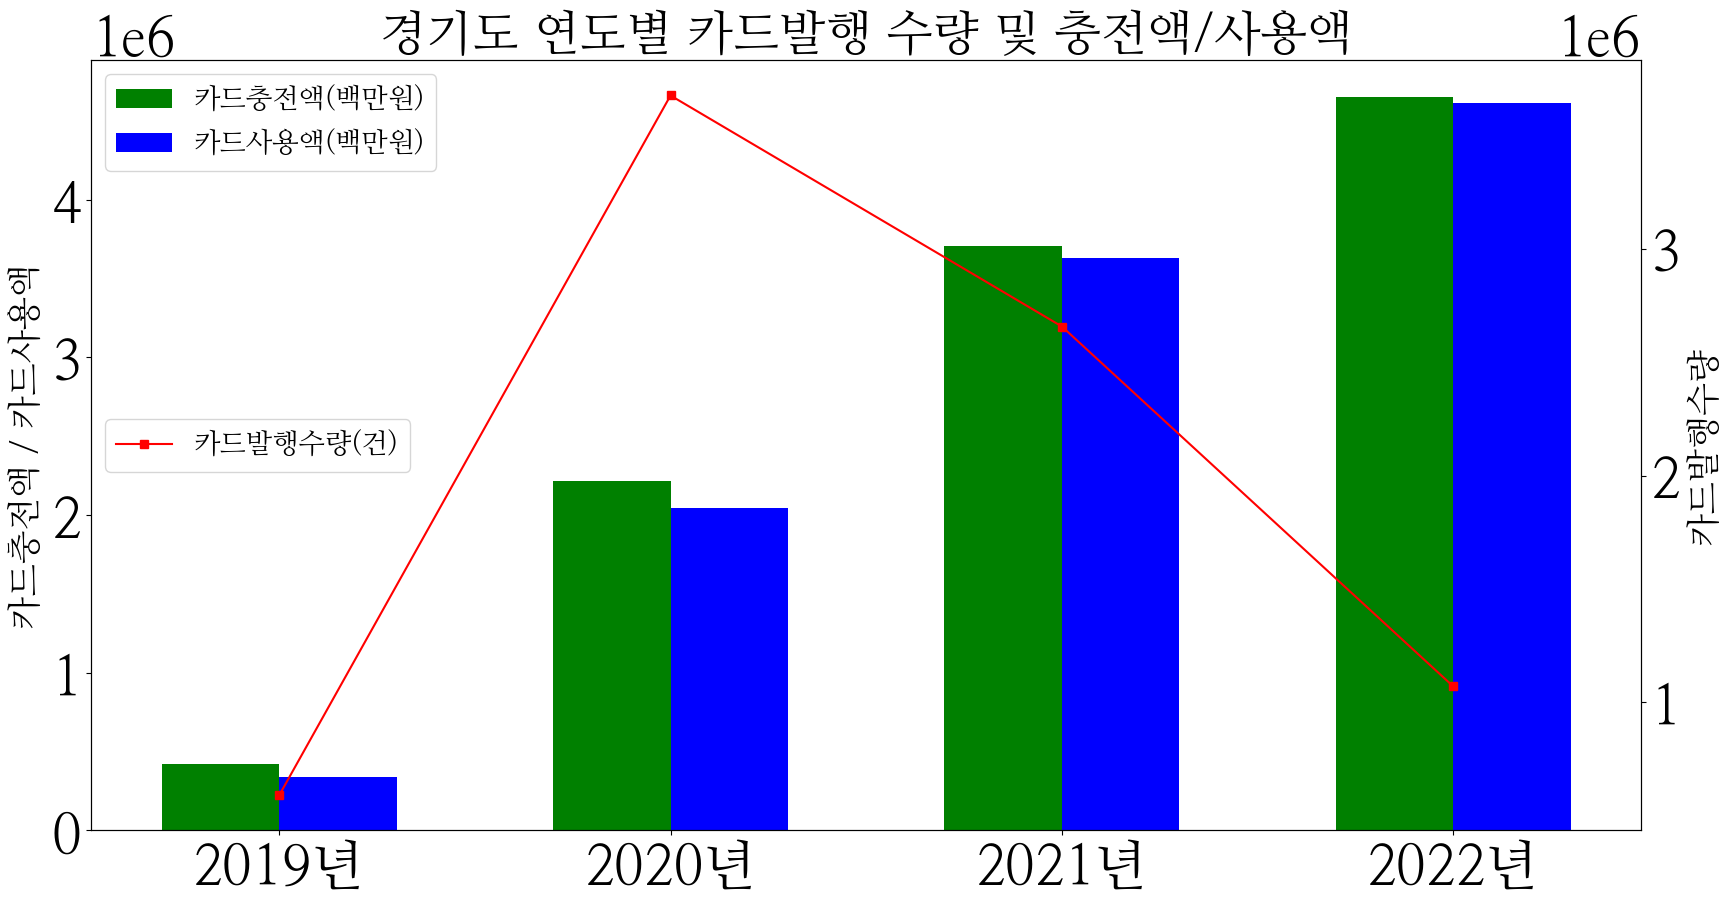

In [403]:

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 10))

n = len(total['년도'].unique())
index = np.arange(n)

bar_width = 0.3
ax1.bar(index - bar_width/2, total['카드충전액(백만원)'], width=bar_width, color='green', label='카드충전액(백만원)')
ax1.bar(index + bar_width/2, total['카드사용액(백만원)'], width=bar_width, color='blue', label='카드사용액(백만원)')
ax1.legend(loc=2)
ax1.set_ylabel('카드충전액 / 카드사용액', fontsize=25)
ax2 = ax1.twinx()
ax2.set_xlabel('년도', fontsize=10)
ax2.set_ylabel('카드발행수량', fontsize=25)
ax2.plot(total['년도'], total['카드발행수량(건)'], marker='s', color='red')
ax2.legend(['카드발행수량(건)'], loc=6)


plt.title('경기도 연도별 카드발행 수량 및 충전액/사용액', fontsize=35)
plt.grid(visible = False)

plt.show()

In [404]:
# 인구 및 지역화폐 이용 내역의 차이를 보여주기 위해 주민등록 인구 집계 현황을 불러옴
population = pd.read_csv('team7/주민등록인구집계현황.csv', encoding='CP949', low_memory=False)
population['행정구역명'] = population['행정구역명'].str.strip()


# 필요없는 컬럼 삭제
population = population.drop(['월', '0~9세', '10~19세', '20~29세', '30~39세',
       '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상',
       '총 인구수 (남)', '0~9세 (남)', '10~19세 (남)', '20~29세 (남)', '30~39세 (남)',
       '40~49세 (남)', '50~59세 (남)', '60~69세 (남)', '70~79세 (남)', '80~89세 (남)',
       '90~99세 (남)', '100세 이상 (남)', '총 인구수 (여)', '0~9세 (여)', '10~19세 (여)',
       '20~29세 (여)', '30~39세 (여)', '40~49세 (여)', '50~59세 (여)', '60~69세 (여)',
       '70~79세 (여)', '80~89세 (여)', '90~99세 (여)', '100세 이상 (여)'], axis=1)

# 인구에서 시군으로만 나오게 
population = population[population['행정구역구분명'] == '시군']

# 행정구역 보기 쉽게 
population['행정구역명_2'] = population['행정구역명'].str.split(' ').str[1]  # 행정구역 보기 쉽게
population = population.drop(['행정구역구분명', '행정구역명'], axis=1)
population.reset_index(drop = True)

# 인구 연도 19년도에서 22년 까지만 비교를 하기 위해 나머지 년도의 자료는 삭제
population = population[population['연도'] >= 2019]
population = population[population['연도'] <= 2022]


In [405]:
population.astype({"총 인구수": "int"})

,연도,총 인구수,행정구역명_2
1247,2022,62197,가평군
1254,2022,1075202,고양시
1302,2022,77775,과천시
1309,2022,288182,광명시
1329,2022,391704,광주시
...,...,...,...
30222,2019,452564,파주시
30241,2019,496324,평택시
30264,2019,150192,포천시
30279,2019,256611,하남시


In [458]:
# 인구 및 지역화폐 분석을 위해 다시 불러옴
temp1 = local_g.groupby('시군명').sum()
temp1 = temp1.rename({'월별카드발행수량(건)': '카드발행수량',
              '월별카드충전액(천원)': '카드충전액',
              '월별카드사용액(천원)': '카드사용액'
             }, axis=1).reset_index().drop(['카드충전액','카드발행수량', '월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)','월별지류상품권회수액(천원)'], axis=1)
temp1['카드사용액(백만원)'] = temp1['카드사용액'] / 1000
temp1.drop('카드사용액', axis=1, inplace=True)
temp1.sort_values(by='카드사용액(백만원)', ascending=False, inplace = True)
temp1.drop([13, 7], inplace=True)

use = temp1
use = use.sort_values('시군명')  

use

,시군명,카드사용액(백만원)
0,가평군,63387.204
1,고양시,656084.403
2,과천시,105491.745
3,광명시,290196.339
4,광주시,516610.528
5,구리시,212276.160
6,군포시,413767.688
8,남양주시,559502.093
9,동두천시,61281.543
10,부천시,745194.439


In [459]:
pivot_temp1 = pd.pivot_table(population,
               index = "행정구역명_2",
               columns = "연도",
               values = "총 인구수",
               aggfunc = 'mean' )

# 필요 없는 행정구역 삭제
a = pivot_temp1.reset_index()
a.drop([17, 30, 33], axis=0, inplace=True)
a.set_index('행정구역명_2')

# 경기도 시군별 19년도부터 21년도까지의 평균 인구를 구하기
a['인구평균'] = a.mean(axis='columns')

pop_means = a.drop([2019, 2020, 2021, 2022], axis=1)  # 행정구역 별 인구 평균

pop_means['인구비율'] = pop_means["인구평균"]/pop_means["인구평균"].sum()*100  # 구한 평균을 통해 인구 비율을 구함

pop_means = pop_means.drop([7, 13], axis=0) # 자료가 없었던 김포시와 시흥시 삭제

pop_means = pop_means.set_index('행정구역명_2')

C:\Users\jungh\AppData\Local\Temp\ipykernel_4660\3459535288.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a['인구평균'] = a.mean(axis='columns')


In [460]:
use['temp'] = use['카드사용액(백만원)'] / use['카드사용액(백만원)'].sum()*100  #카드 사용액의 비율을 구하기 위한 임시 파일
use = use.set_index('시군명')  # 시군 정렬
pop_means['총사용액'] = use['카드사용액(백만원)'] 
pop_means['사용비율'] = pop_means['총사용액']/pop_means["총사용액"].sum()*100
pop_means=pop_means.reset_index()


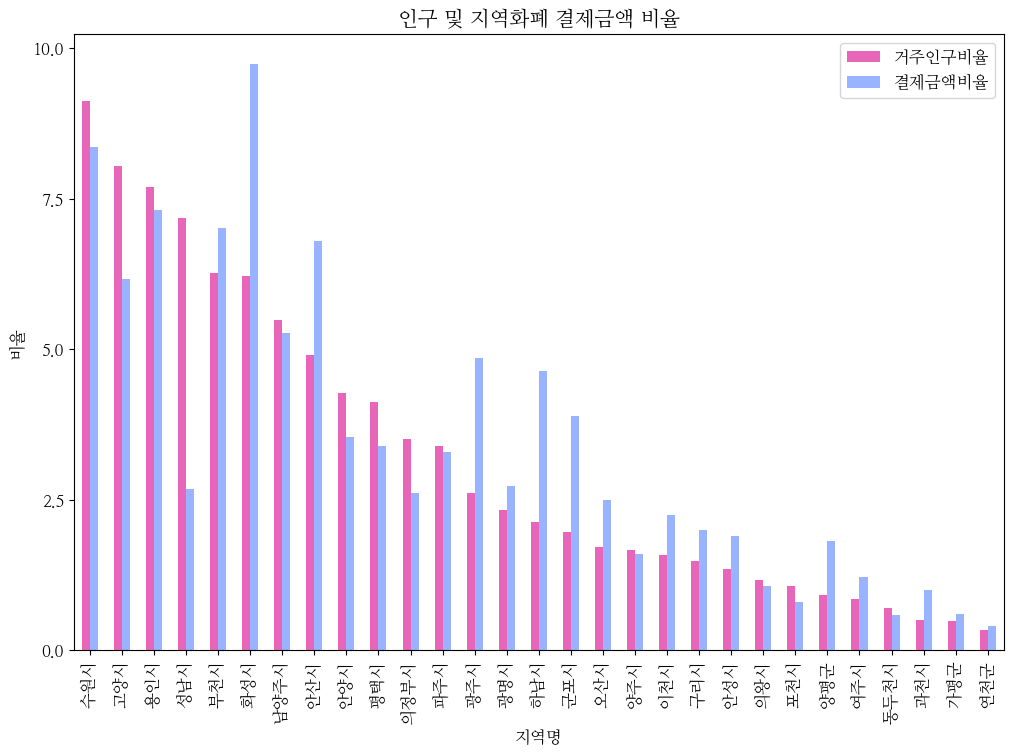

In [461]:
#3.인구비율과 지역화폐 결제금액 비율을 동시에 시각화

pop_df = pop_means[["행정구역명_2", "인구비율","사용비율"]]  
pop_df = pop_df.set_index("행정구역명_2") 

# 시군구별 인구 및 지역화폐 결재금액 시각화
ax=pop_df.sort_values(by='인구비율', ascending=False).plot(kind='bar', figsize=(12, 8), legend=True, fontsize=12, color=['#E866BA','#98B3FF']) 
ax.set_xlabel('지역명', fontsize=12) 
ax.set_ylabel('비율', fontsize=12) 
plt.title("인구 및 지역화폐 결제금액 비율", fontsize=15)
ax.legend(['거주인구비율', '결제금액비율'], fontsize=12) 
plt.show()

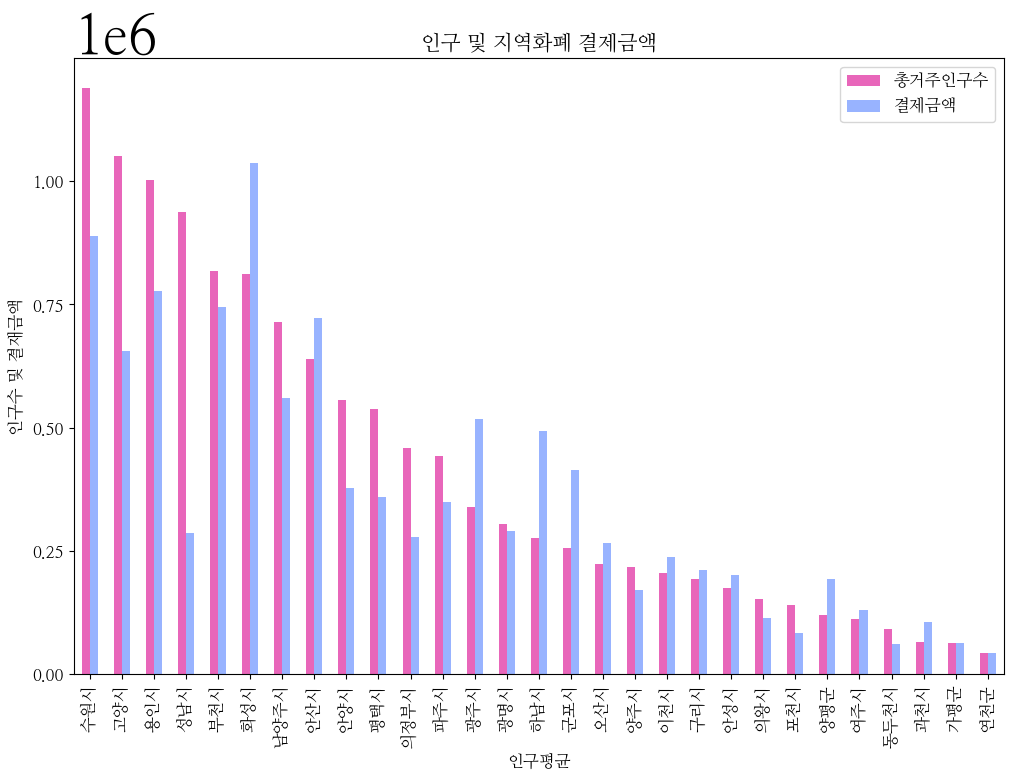

In [462]:
# 인구평균과 총사용액 비교

pop_df2 = pop_means[["행정구역명_2", "인구평균","총사용액"]]  

pop_df2 = pop_df2.set_index('행정구역명_2')

# 인구 및 지역화폐 결제 금액에 대한 표
ax=pop_df2.sort_values(by='인구평균', ascending=False).plot(kind='bar', figsize=(12, 8), legend=True, fontsize=12, color=['#E866BA','#98B3FF']) 
ax.set_xlabel('인구평균', fontsize=12) 
ax.set_ylabel('인구수 및 결재금액', fontsize=12) 
plt.title("인구 및 지역화폐 결제금액", fontsize=15)
ax.legend(['총거주인구수', '결제금액'], fontsize=12) 


수원, 성남, 화성, 광주

연도,인구평균,총사용액
행정구역명_2,,
가평군,6.243416e+04,63387.204
고양시,1.050240e+06,656084.403
과천시,6.522515e+04,105491.745
광명시,3.042099e+05,290196.339
광주시,3.398383e+05,516610.528
구리시,1.925155e+05,212276.160
군포시,2.561661e+05,413767.688
남양주시,7.151947e+05,559502.093
동두천시,9.214467e+04,61281.543


In [952]:
# 가구수에 따른 변화를 확인 하기 위한 작업 파일
family = pd.read_csv('team7/세대원수별세대수집계현황.csv', encoding='CP949', low_memory=False)

# 19년도 부터 21년까지의 자료만 사용
family = family[family['연도'] >= 2019]

# 시군 데이터만 사용
family = family[family['행정구역구분명'] == '시군'] 
family['행정구역명'] = family['행정구역명'].str.split(' ').str[1]

#필요 없는 데이터 삭제
family.drop(['행정구역구분명'], axis=1, inplace=True)

# 인덱스 수정
family.set_index('행정구역명', inplace=True)

# 3인 이상의 세대수는 하나로 통합
family['3인 이상 세대수'] = family['3인 세대수'] + family['4인 세대수'] + family['5인 세대수'] + family['6인 세대수'] + family['7인 세대수'] + family['8인 세대수'] + family['9인 세대수'] + family['10인이상 세대수'] 

# 필요 없는 데이터 삭제
family = family.drop(['3인 세대수', '4인 세대수', '5인 세대수', '6인 세대수', '7인 세대수', '8인 세대수', '9인 세대수', '10인이상 세대수'], axis=1)
family = family[family['연도'] < 2023]


family = family.groupby(['행정구역명','연도']).mean().drop(['월'], axis=1)

family = family.groupby('행정구역명').mean()
family = family.reset_index().drop([6, 13])
family.reset_index()

,index,행정구역명,전체 세대수,1인 세대수,2인 세대수,3인 이상 세대수
0,0,가평군,31370.243056,15339.243056,7985.055556,8045.944444
1,1,고양시,436054.020833,147280.854167,97105.895833,191667.270833
2,2,과천시,24074.041667,5995.791667,5097.854167,12980.395833
3,3,광명시,122732.604167,37932.645833,28327.208333,56472.750000
4,4,광주시,152592.583333,53796.875000,36750.458333,62045.250000
5,5,구리시,79081.395833,26057.020833,17521.958333,35502.416667
6,7,김포시,177183.875000,57061.770833,39796.812500,80325.291667
7,8,남양주시,281164.416667,85895.125000,65978.854167,129290.437500
8,9,동두천시,42749.937500,17929.437500,10671.291667,14149.208333
9,10,부천시,343484.916667,116620.229167,80138.958333,146725.729167


In [953]:
family4 = family.loc[[12, 11, 30, 4]]
family4.sort_values('행정구역명') 

In [960]:
family5 = family4.set_index('행정구역명').sort_index()

In [961]:
family5

,전체 세대수,1인 세대수,2인 세대수,3인 이상 세대수
행정구역명,,,,
광주시,152592.583333,53796.875000,36750.458333,62045.250000
성남시,405186.895833,152629.062500,87902.354167,164655.479167
수원시,509378.604167,193958.604167,102818.708333,212601.291667
화성시,328062.187500,116736.562500,64290.812500,147034.812500


In [963]:
# 가구별 비율 나타내기
family5["1인가구 비율"] = family5["1인 세대수"] / family5["전체 세대수"]*100
family5["2인가구 비율"] = family5["2인 세대수"] / family5["전체 세대수"]*100
family5["3인이상 비율"] = family5["3인 이상 세대수"] / family5["전체 세대수"]*100


In [964]:
family5 = family5.astype({"1인 세대수": "int",
              "2인 세대수": "int",
              "3인 이상 세대수": "int"})

In [965]:
family6 = family5.drop(['전체 세대수', '1인 세대수', '2인 세대수', '3인 이상 세대수'], axis=1)

In [966]:
family6

,1인가구 비율,2인가구 비율,3인이상 비율
행정구역명,,,
광주시,35.255236,24.084040,40.660725
성남시,37.668805,21.694274,40.636921
수원시,38.077493,20.185125,41.737382
화성시,35.583669,19.597142,44.819189


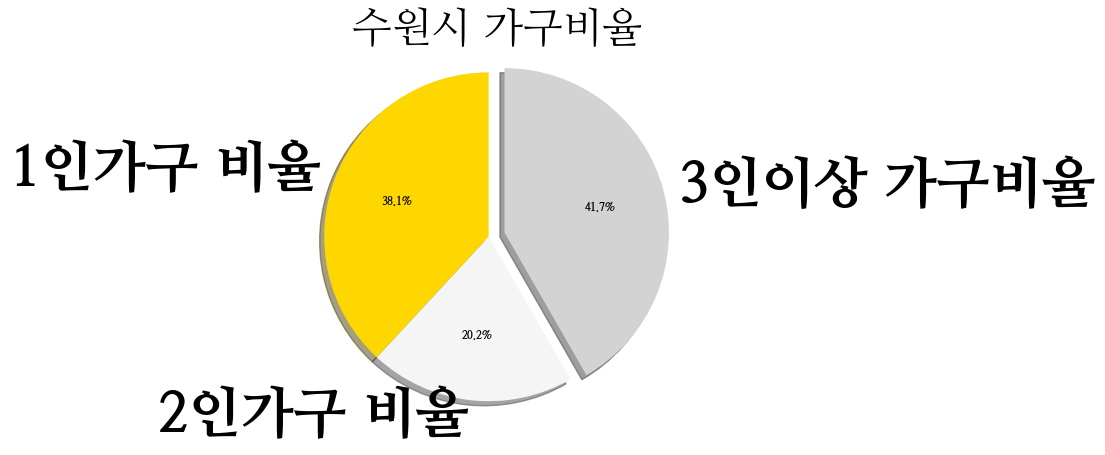

In [944]:
# 수원시 가구비율
labels = ['1인가구 비율', '2인가구 비율', '3인이상 가구비율']
sizes = [38.1, 20.2, 41.7]
colors = ['gold', 'whitesmoke', 'lightgray']
explode = (0, 0, 0.1)
plt.title('수원시 가구비율', size=30)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 원의 형태를 유지 
plt.rc('figure', titlesize=5)
plt.show()

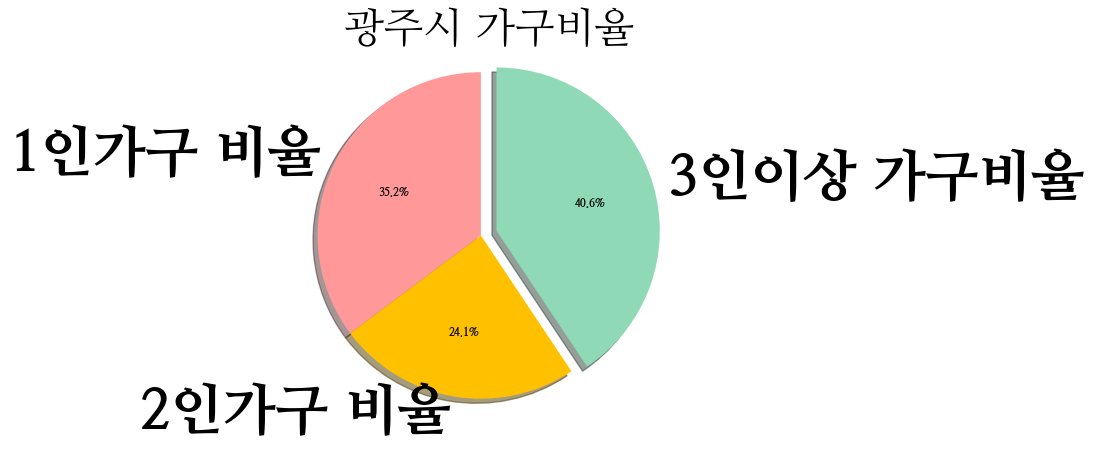

In [942]:
# 광주시 가구비율
labels = ['1인가구 비율', '2인가구 비율', '3인이상 가구비율']
sizes = [35.2, 24.1, 40.6]
colors = ['#ff9999', '#ffc000', '#8fd9b6']
explode = (0, 0, 0.1)
plt.title('광주시 가구비율', size=30)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 원의 형태를 유지 
plt.show()

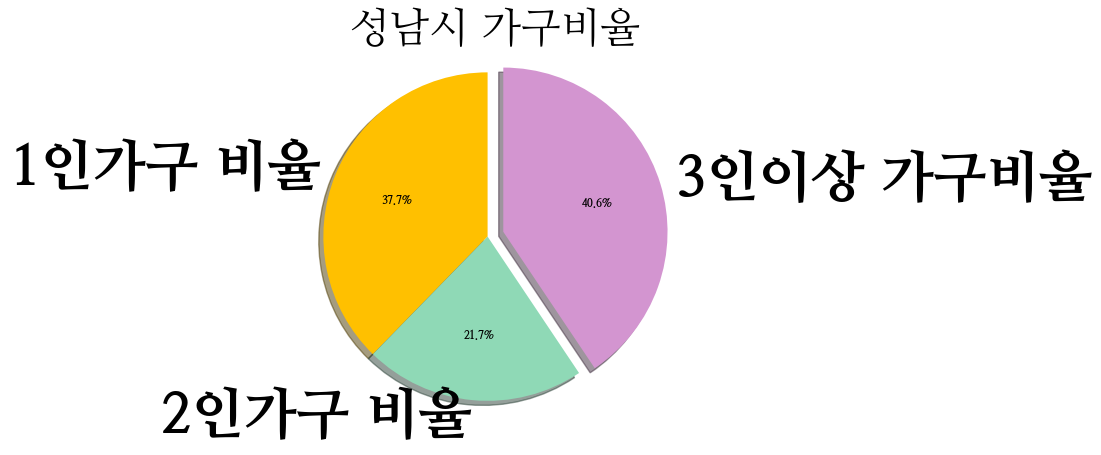

In [945]:
# 성남시 가구비율
labels = ['1인가구 비율', '2인가구 비율', '3인이상 가구비율']
sizes = [37.7, 21.7, 40.6]
colors = ['#ffc000', '#8fd9b6', '#d395d0']
explode = (0, 0, 0.1)
plt.title('성남시 가구비율', size=30)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 원의 형태를 유지 
plt.show()

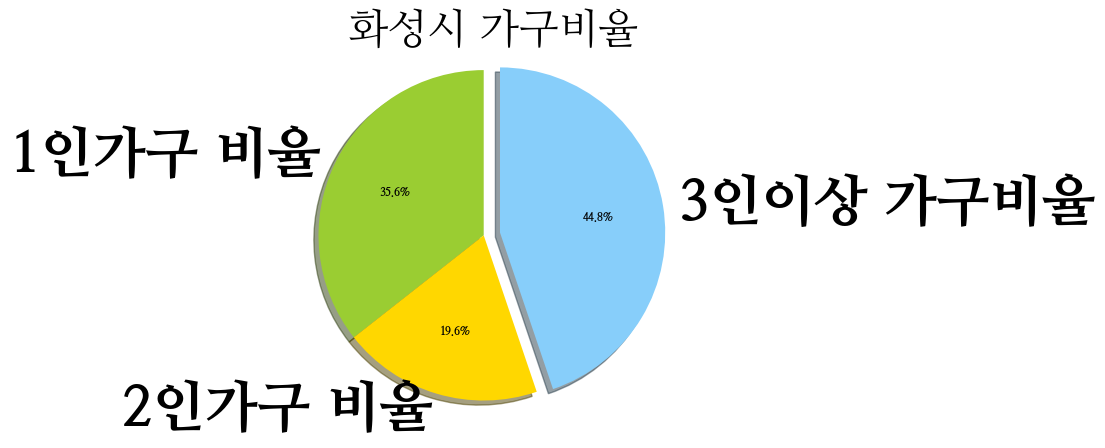

In [939]:
# 화성시 가구비율
labels = ['1인가구 비율', '2인가구 비율', '3인이상 가구비율']
sizes = [35.6, 19.6, 44.8]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0, 0.1)
plt.title('화성시 가구비율', size=30)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 원의 형태를 유지 
plt.show()